# Задание
Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

* построить не менее 6 визуализаций (не менее 4 визуализаций различных видов, обязательно включая boxplot, heatmap, scatter plot matrix);
* каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
* по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

# Данные

Данные о краудфандинг проектах на kickstarter.com

#### Источник
https://www.kaggle.com/datasets/kemical/kickstarter-projects?select=ks-projects-201801.csv

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
projects = pd.read_csv('ks-projects-201801.csv')
projects.head()

,Unnamed: 0,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [ ]:
projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        378661 non-null  int64  
 1   ID                378661 non-null  int64  
 2   name              378657 non-null  object 
 3   category          378661 non-null  object 
 4   main_category     378661 non-null  object 
 5   currency          378661 non-null  object 
 6   deadline          378661 non-null  object 
 7   goal              378661 non-null  float64
 8   launched          378661 non-null  object 
 9   pledged           378661 non-null  float64
 10  state             378661 non-null  object 
 11  backers           378661 non-null  int64  
 12  country           378661 non-null  object 
 13  usd pledged       374864 non-null  float64
 14  usd_pledged_real  378661 non-null  float64
 15  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64

В датасете присутсвуют временнЫе данные, загруженные как объекты. Приведем их к datetype

In [ ]:
projects['deadline'] = projects['deadline'].astype('datetime64')
projects['launched'] = projects['launched'].astype('datetime64')
projects.dtypes

Unnamed: 0                   int64
ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

Отдельно выделим год старта и длительность проекта для удобства дальнейшего анализа

In [ ]:
projects['launch_year'] = pd.DatetimeIndex(projects['launched']).year
projects['days_running'] = (projects['deadline'] - projects['launched']).dt.days

7 проектов отмечены как начавшиеся в 1970 году. Это явная ошибка, так как остальные записи начинаются с 2009 года (год основания kickstarter). Удалим эти записи, т.к. их очень немного.
Также, удалим данные за 2018 год, так как данные присутсвуют только за январь 2018.

In [ ]:
projects['launch_year'].value_counts()

2015    77300
2014    67745
2016    57184
2017    52200
2013    44851
2012    41165
2011    26237
2010    10519
2009     1329
2018      124
1970        7
Name: launch_year, dtype: int64

In [ ]:
projects = projects[projects['launch_year'].between(2000, 2018, inclusive='neither')]

Также удалим лишние столбцы

In [ ]:
projects.drop(['Unnamed: 0', 'name', 'usd pledged', 'goal', 'category', 'launched', 'pledged'], axis=1, inplace=True)
projects.head()

,ID,main_category,currency,deadline,state,backers,country,usd_pledged_real,usd_goal_real,launch_year,days_running
0,1000002330,Publishing,GBP,2015-10-09,failed,0,GB,0.0,1533.95,2015,58
1,1000003930,Film & Video,USD,2017-11-01,failed,15,US,2421.0,30000.00,2017,59
2,1000004038,Film & Video,USD,2013-02-26,failed,3,US,220.0,45000.00,2013,44
3,1000007540,Music,USD,2012-04-16,failed,1,US,1.0,5000.00,2012,29
4,1000011046,Film & Video,USD,2015-08-29,canceled,14,US,1283.0,19500.00,2015,55


In [ ]:
projects.shape

(378530, 11)

Пропуски в данных отсутствуют.

In [ ]:
projects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378530 entries, 0 to 378660
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                378530 non-null  int64         
 1   main_category     378530 non-null  object        
 2   currency          378530 non-null  object        
 3   deadline          378530 non-null  datetime64[ns]
 4   state             378530 non-null  object        
 5   backers           378530 non-null  int64         
 6   country           378530 non-null  object        
 7   usd_pledged_real  378530 non-null  float64       
 8   usd_goal_real     378530 non-null  float64       
 9   launch_year       378530 non-null  int64         
 10  days_running      378530 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 34.7+ MB


In [ ]:
projects['main_category'].value_counts()

Film & Video    63573
Music           51899
Publishing      39857
Games           35214
Technology      32558
Design          30060
Art             28134
Food            24597
Fashion         22810
Theater         10910
Comics          10816
Photography     10777
Crafts           8806
Journalism       4751
Dance            3768
Name: main_category, dtype: int64

In [ ]:
projects['state'].value_counts()

failed        197719
successful    133956
canceled       38771
undefined       3562
live            2677
suspended       1845
Name: state, dtype: int64

In [ ]:
projects[['backers', 'usd_pledged_real', 'usd_goal_real', 'days_running']].describe()

,backers,usd_pledged_real,usd_goal_real,days_running
count,378530.000000,3.785300e+05,3.785300e+05,378530.000000
mean,105.650960,9.061892e+03,4.546548e+04,33.204158
std,907.340143,9.098894e+04,1.153149e+06,12.793550
min,0.000000,0.000000e+00,1.000000e-02,0.000000
25%,2.000000,3.100000e+01,2.000000e+03,29.000000
50%,12.000000,6.250000e+02,5.500000e+03,29.000000
75%,56.000000,4.050200e+03,1.550000e+04,36.000000
max,219382.000000,2.033899e+07,1.663614e+08,91.000000


***

Для начала, посмотрим, связаны ли между собой какие-либо из атрибутов.
Так, цель, собранные средства, и длительность проета могут коррелировать.

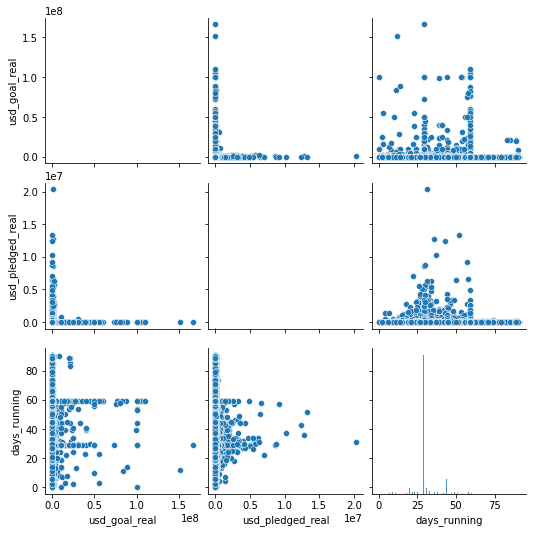

In [ ]:
sns.pairplot(projects[['usd_goal_real', 'usd_pledged_real', 'days_running']])
plt.show()

Из графиков видно, что есть небольшая положительная зависимость цели и собранных средств от длительности проекта. Однако, после достижения определенного порога, эта зависимость пропадает. Это может быть связано с тем, что некоторые проекты могли быть закрыты досрочно (достигнув цели или просто отменены)

Посмотрим, менялось ли количество успешных и провалившихся проектов с течением времени.
С увеличением популярности платформы, количество проектов могло увеличиться

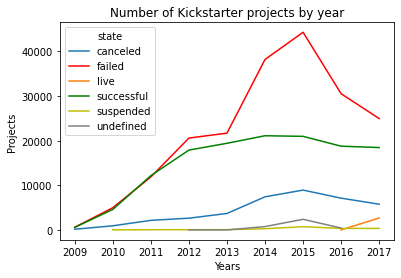

In [ ]:
df_group_year = projects.groupby(['launch_year','state']).agg({'ID':'count'}).reset_index()
df_group_year = df_group_year.pivot_table(index='launch_year', columns='state', values='ID')

df_group_year.plot(style={'failed': 'r', 'successful': 'g', 'suspended': 'y', 'undefined': 'grey'})
plt.title('Number of Kickstarter projects by year')
plt.ylabel('Projects')
plt.xlabel('Years')
plt.show()

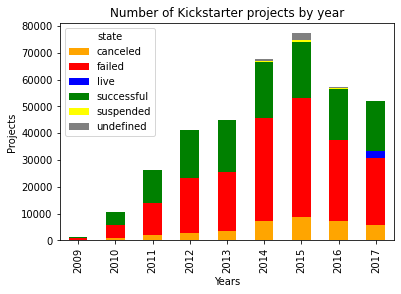

In [ ]:
df_group_year.plot(kind='bar', stacked=True, color=['orange', 'r', 'blue', 'g', 'yellow', 'grey'])
plt.title('Number of Kickstarter projects by year')
plt.ylabel('Projects')
plt.xlabel('Years')
plt.show()

Действительно, количество проектов (как успешных, так и нет) росло, достигнув пика в 2015 году, затем стало снижаться. Примечательно, что количество успешных проектов не слишком изменялось в период с 2012 по 2017 год; в то время как количество провалившихся проектов, резко увеличившись в 2013-2015 годах, также резко уменьшилось в 2015-2017 годах.

Рост неуспешных проектов может быть связан с введением частичной автоматизации проверки проектов перед публикацией, либо стабильным (не увеличивающемся) интересом публики к подобным проектам в сочетании с ростом интереса стартаперов в данном способе финансирования. Кроме того, с конца 2012 года Kickstater начал вести деятельность в других странах.

Снижение количества проектов в 2015 году может быть связано с созданием и ростом популярности таких конкурентов как Patreon и SeedInvest, а также судебным иском о нарушении патента против ряда краудфандинговых платформ, поданным в январе 2015 года.

Возможно также, что шансы на успех проекта зависят от его категории.

In [ ]:
df_failed_successful = projects[projects['state'].isin(['failed','successful'])]
df_failed_successful.shape

(331675, 11)

In [ ]:
df_failed_successful = projects[projects['state'].isin(['failed','successful'])]
df_failed_successful_count = df_failed_successful.groupby(['launch_year','state']).agg({'ID':'count'}).reset_index()
df_failed_successful_count = df_failed_successful_count.pivot_table(index='launch_year', columns='state', values='ID')
df_failed_successful_count.head()

state,failed,successful
launch_year,,
2009,600,579
2010,4984,4593
2011,11878,12171
2012,20588,17892
2013,21686,19415


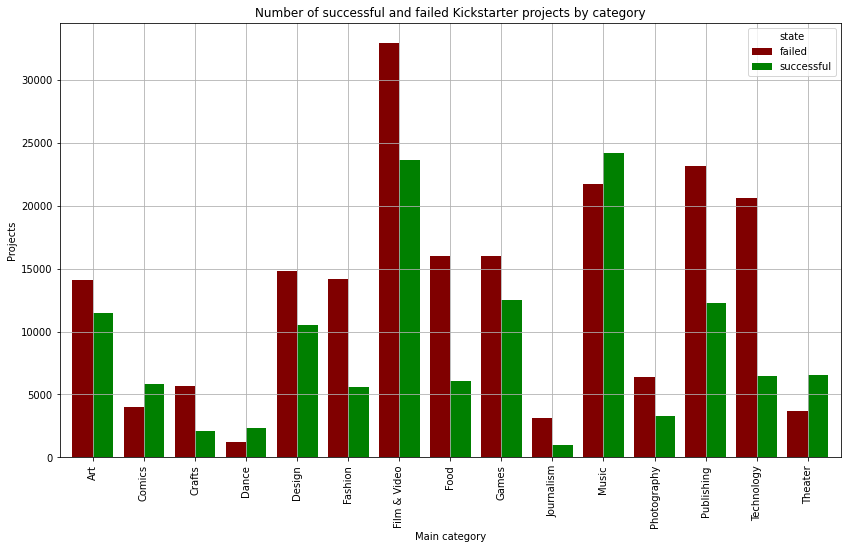

In [ ]:
df_failed_successful_by_groups = df_failed_successful.groupby(['main_category', 'state']).agg({'ID':'count'})
df_failed_successful_by_groups = df_failed_successful_by_groups.pivot_table(index='main_category', columns='state', values='ID')

df_failed_successful_by_groups.plot(kind='bar', 
                                    color={'failed': 'maroon', 'successful': 'green'}, 
                                    figsize=(14,8), 
                                    width=0.8,
                                    grid=True)
plt.title("Number of successful and failed Kickstarter projects by category")
plt.xlabel('Main category')
plt.ylabel('Projects')
plt.show()

Во многих категориях количество провалившихся проектов превышает количество успешных. Однако, в категориях Comics, Dance, Music и Theater успешных проектов больше. Возможно, это связано с тем, что в более творческих категориях немного легче выделиться и привлечь внимание инвесторов. Также возможно что в проектах этих категорий цель, в среднем, ниже и поэтому ее легче достичь.

Крайнее утверждение частично отражается в графике ниже.

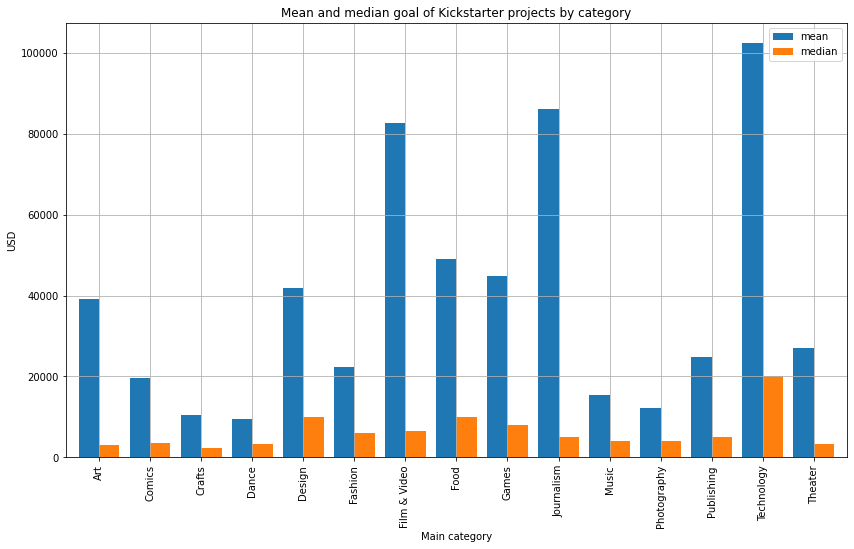

In [ ]:
df_goals = projects.groupby('main_category').agg({'usd_goal_real':['mean', 'median']})
df_goals.columns = ['mean', 'median']
df_goals.plot(kind='bar', 
            figsize=(14,8), 
            width=0.8,
            grid=True)
plt.title("Mean and median goal of Kickstarter projects by category")
plt.xlabel('Main category')
plt.ylabel('USD')
plt.show()

*****

Менялось ли количество проектов в различных категориях с течением времени?

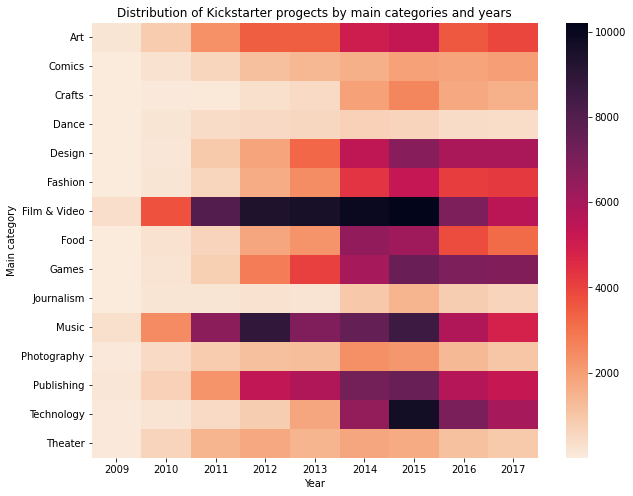

In [ ]:
category_by_year = projects.groupby(['main_category', 'launch_year'])[['ID']].count().reset_index()
category_by_year = category_by_year.pivot_table(index='main_category', columns='launch_year', values='ID')

plt.figure(figsize = (10,8))
sns.heatmap(category_by_year, cmap='rocket_r')
plt.title('Distribution of Kickstarter progects by main categories and years')
plt.ylabel('Main category')
plt.xlabel('Year')
plt.show()

Проекты в категориях Film&Video, Music и Publishing создавались в довольно большом количестве с начала существования Kickstarter, возможно краудфандинг является для стартапов в этих категориях популярным способом финансирования; категории Design, Games и Technology начали набирать популярность, возможно из-за развития этих отраслей.

Посмотрим, отличается ли ситуация с успешными проектами.

In [ ]:
df_successful = projects[projects['state'] == 'successful']
print(df_successful.shape)

(133956, 11)


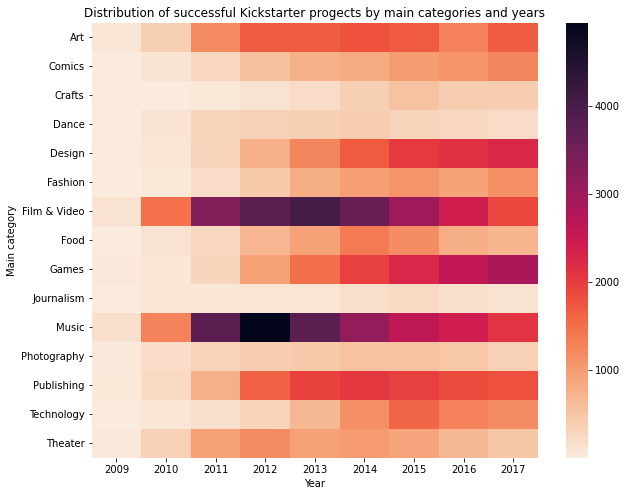

In [ ]:
category_by_year_success = df_successful.groupby(['main_category', 'launch_year'])[['ID']].count().reset_index()
category_by_year_success = category_by_year_success.pivot_table(index='main_category', columns='launch_year', values='ID')

plt.figure(figsize = (10,8))
sns.heatmap(category_by_year_success, cmap='rocket_r')
plt.title('Distribution of successful Kickstarter progects by main categories and years')
plt.ylabel('Main category')
plt.xlabel('Year')
plt.show()

Успешных проектов довольно много в категориях Film&Video и Music; возросло количество успешных проектов в категориях Design и Games. Данные по категориям Technology и Publishing также отображают общую тендерцию категории, показанную на графике выше, однако процент успешных проектов в каждом году заметно ниже чем в Film&Video, Music, Design и Games. Возможные причины уже были описаны выше, при сравнении количества успешных и неуспешных проектов.

*****

Совпадают ли сферы интересов создателей проектов и инвесторов?
Ниже приведены распределения количества инвесторов (рис1) и собранных средств по категориям (рис2). Данные урезаны для лучшей видимости основных показателей.

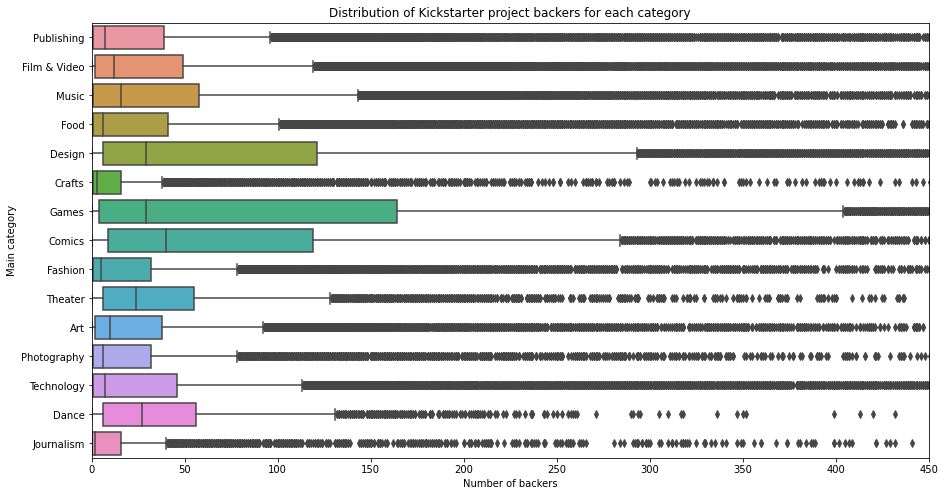

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(y="main_category", x="backers", 
                 data=projects)
ax.set_title('Distribution of Kickstarter project backers for each category')
ax.set_ylabel('Main category')
ax.set_xlabel('Number of backers')
ax.set_xlim([0,450])
plt.show()

*рис1*

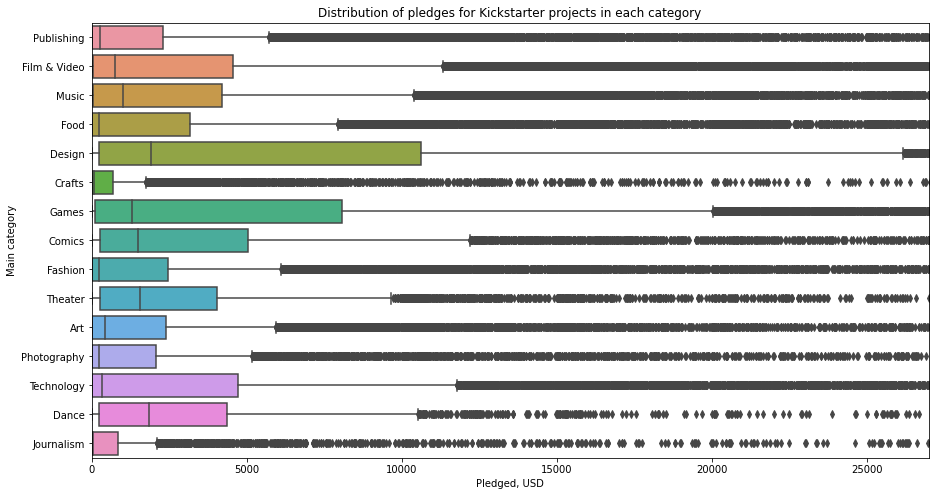

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(y="main_category", x="usd_pledged_real", 
                 data=projects)
ax.set_xlim([0,27000])
ax.set_title('Distribution of pledges for Kickstarter projects in each category')
ax.set_ylabel('Main category')
ax.set_xlabel('Pledged, USD')
plt.show()

*рис2*

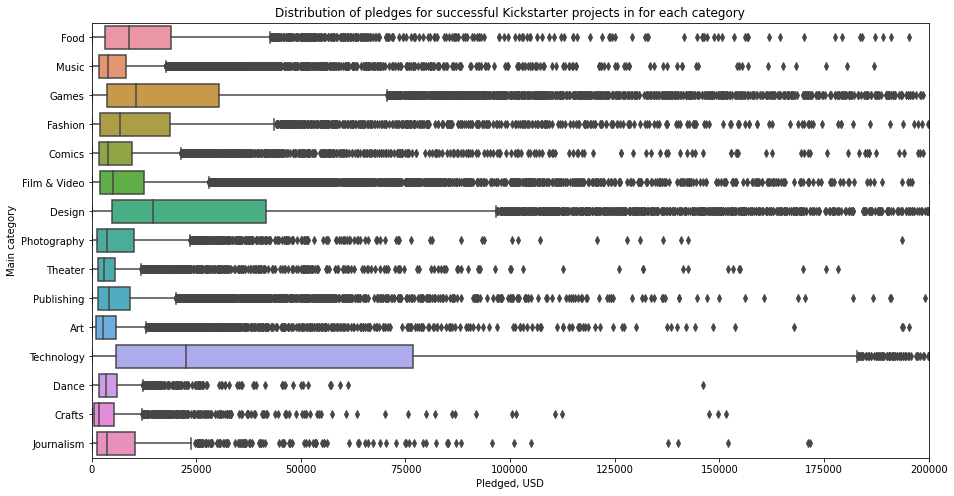

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(y="main_category", x="usd_pledged_real", 
                 data=df_successful)
ax.set_xlim([0,200000])
ax.set_title('Distribution of pledges for successful Kickstarter projects in for each category')
ax.set_ylabel('Main category')
ax.set_xlabel('Pledged, USD')
plt.show()

*рис3*

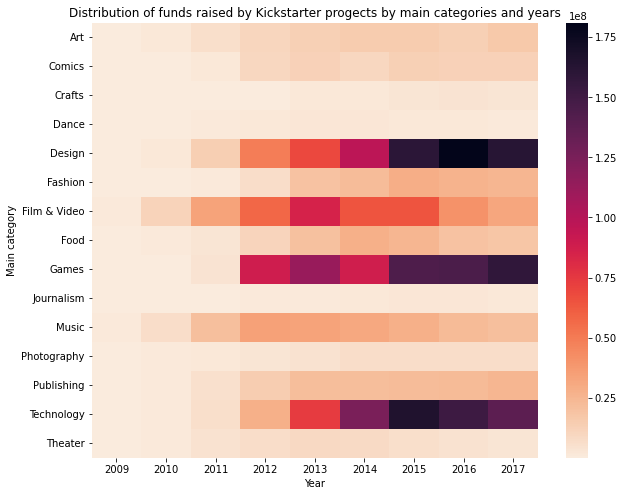

In [ ]:
pledges_years = projects.groupby(['main_category', 'launch_year'])['usd_pledged_real'].sum().reset_index()
pledges_years = pledges_years.pivot_table(index='main_category', columns='launch_year', values='usd_pledged_real')

plt.figure(figsize = (10,8))
sns.heatmap(pledges_years, cmap='rocket_r')
plt.title('Distribution of funds raised by Kickstarter progects by main categories and years')
plt.ylabel('Main category')
plt.xlabel('Year')
plt.show()

*рис4*

Pаспределения количества инвесторов и собранных средств примерно совпадают, показывая, что количество собранных средств коррелирует с количеством инвесторов (что еще более заметно на точечной диаграмме ниже).
Наибольшее финансирование также получают категории Design, Games, а также Comics, что согласуется с распределением интересов создателей проектов. При этом, если посмотреть на данные по годам, наблюдается немного другая картина (рис4). Design и Games все также имеют высокие показатели, но также набрала популярность категория Technology (что согласуется с всеобщим повышением интреса к данной области); в то же время показатели категории Film&Video достигли пика в 2013 году, а затем пошли на спад.

Также, в категории Technology показатели количества инвесторов заметно меньше показателей собранных средств в сравнении с другими категориями. Это может указывать на то, что в данной категории больше более крупных инвесторов.
Тем не менее, успешных проектов в данной категории сравнительно не много, что может объясняться высокими целями по необходимому бюджету, как может быть видно из распределения собранных средств **успешных проектов** по категориям (рис3)

Из точечных диаграмм ниже видно, что в целом количество собранных средств пропорционально количеству инвесторов, однако есть проекты с крупными инвесторами, а также проекты, в которых было значительное количество мелких инвесторов.

Второй график был немного приближен.

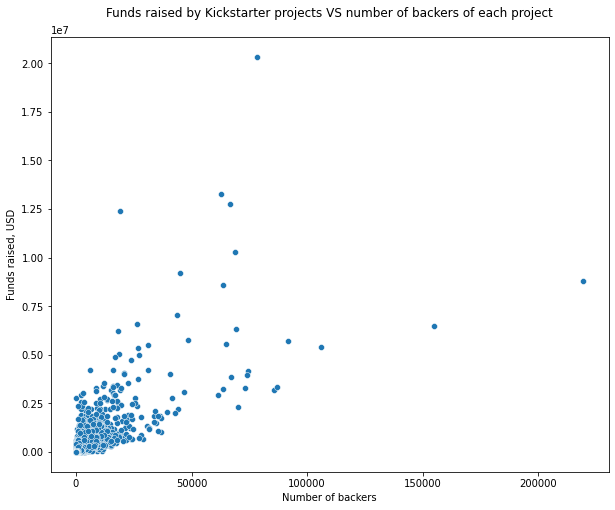

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(data=projects, x='backers', y='usd_pledged_real')
plt.title('Funds raised by Kickstarter projects VS number of backers of each project',
          pad=20)
plt.ylabel('Funds raised, USD')
plt.xlabel('Number of backers')
plt.show()

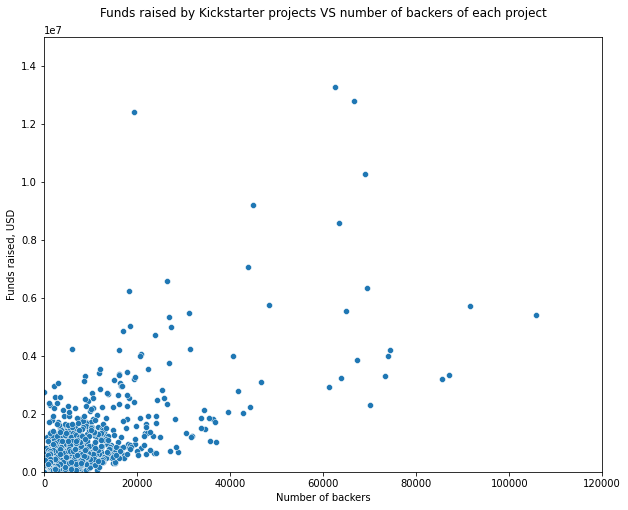

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(data=projects, x='backers', y='usd_pledged_real')
plt.title('Funds raised by Kickstarter projects VS number of backers of each project',
          pad=20)
plt.ylabel('Funds raised, USD')
plt.xlabel('Number of backers')
plt.xlim(0,120000)
plt.ylim(0,15000000)
plt.show()

***

В завершение, посмотрим проектов из каких стран публикуется на Kickstarter больше всего 

In [ ]:
countries = projects.groupby('country')[['ID']].count().reset_index().sort_values('ID')
top_countries_list = countries['country'].tail(3).to_list()

top_countries = [0] * 4

country, count = countries.to_dict().values()
country = list(country.values())
count = list(count.values())

for row in zip(country, count):
    if row[0] in top_countries_list:
        idx = top_countries_list.index(row[0])
    else:
        idx = 3
    top_countries[idx] += row[1]

top_countries_list.append('Other')

top_countries_df = pd.DataFrame({'country':top_countries_list, 'project_count':top_countries})
top_countries_df.set_index('country', inplace=True)

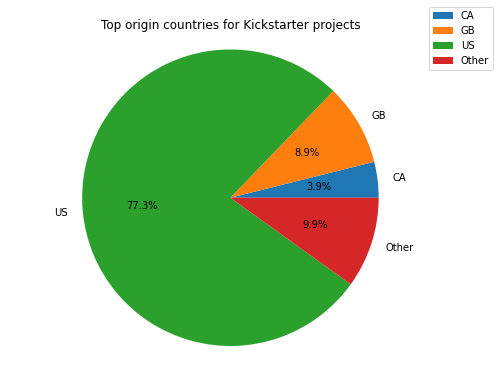

In [ ]:
top_countries_df.plot(kind='pie', autopct='%1.1f%%', subplots=True, figsize = (8,6))
plt.legend(bbox_to_anchor=(0.6, .6, 0.5, 0.5))
plt.axis('equal')
plt.title('Top origin countries for Kickstarter projects')
plt.ylabel('')
plt.show()

Так как Kickstarter является американской компанией, закономерно, что большинство проектов (более 2/3) американские. Великобритания и Канада являются второй и третьей по величине соответственно; этот факт может быть объяснен тем, что это были первые страны, на которые Kickstarter расширил свою деятельность.